In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.load("awake/results.npz", allow_pickle=True)
print(data.keys())

KeysView(NpzFile 'awake/results.npz' with keys: tasks, train_returns, valid_returns)


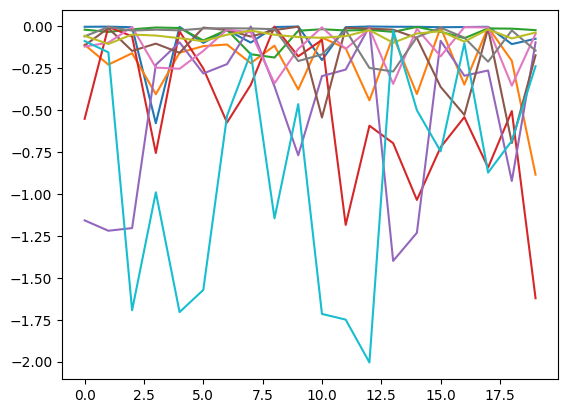

In [20]:
plt.plot(data["valid_returns"][:10,:].T)

In [32]:
train_logs = np.load("awake/train.npy", allow_pickle=True)
train_logs["arr_0"]

array([-10.21295  , -10.849502 , -11.536256 , -13.341835 , -12.047245 ,
       -10.453727 , -14.930281 , -12.543571 , -12.909346 , -10.031096 ,
       -13.107698 , -10.302824 , -12.055876 , -12.311407 , -11.825247 ,
       -13.215082 , -13.782555 , -11.203999 , -12.671232 , -13.668184 ,
       -11.379066 , -12.105983 , -14.056222 , -12.710954 , -14.294584 ,
       -12.67992  , -12.42411  , -11.904341 ,  -7.4033546, -10.800389 ,
        -8.706884 , -10.888819 , -11.457629 , -10.744585 , -13.2096   ,
       -10.035777 , -10.44028  , -12.879143 , -11.002719 ,  -9.404069 ,
       -12.750025 ,  -9.980113 ,  -9.173243 ,  -9.788195 , -11.488279 ,
       -10.943321 , -14.536204 , -12.08345  , -10.71674  ,  -9.588479 ,
       -16.333572 , -11.997364 ,  -9.900209 , -11.611821 , -13.219081 ,
       -11.121834 , -10.107628 , -12.224046 , -11.23102  , -11.920403 ,
       -10.979113 , -11.1761   ,  -9.120162 ,  -8.7682905, -11.180446 ,
       -10.288128 , -11.73036  , -14.491009 , -11.705297 , -12.8

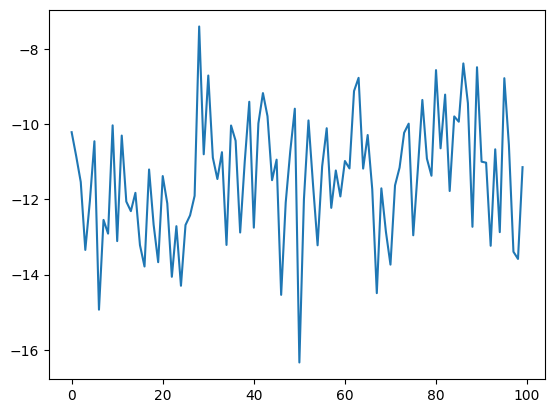

In [33]:
plt.plot(train_logs["arr_0"])

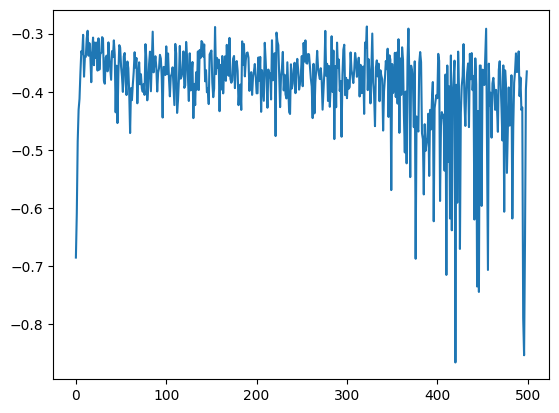

In [29]:
train_logs = np.load("navi/train.npy", allow_pickle=True)
train_logs["arr_0"]
plt.plot(train_logs["arr_0"])

In [76]:
from maml_rl.envs.meta_awake_e_steering import MetaAwakeESteering
from gymnasium.wrappers import RescaleAction
import pickle
import matplotlib.pyplot as plt

with open("maml_rl/envs/Tasks_data/Tasks", "rb") as f:
    tasks = pickle.load(f)

idx = 0
env = MetaAwakeESteering()
env = RescaleAction(env, -1, 1)
env.unwrapped.reset_task(task={
    "goal": tasks[idx],
    "id": idx,
})

In [77]:
observation, info = env.reset()
n_steps = 100

observations = np.zeros((n_steps, observation.shape[0]))
rewards = np.zeros(n_steps)
actions = np.zeros((n_steps, observation.shape[0]))
for i in range(n_steps):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    observations[i] = observation
    rewards[i] = reward
    actions[i] = action

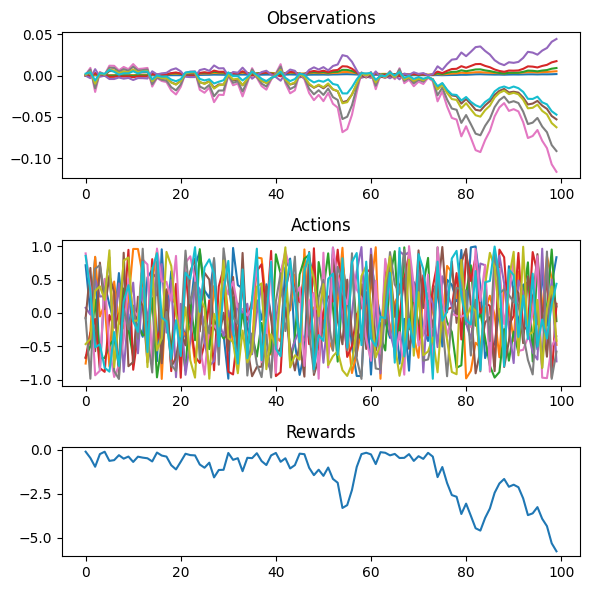

In [78]:
fig, axs = plt.subplots(3,figsize=(6,6), gridspec_kw={'height_ratios': [2,2,1.5]})
axs[0].plot(observations)
axs[1].plot(actions)
axs[2].plot(rewards)

axs[0].set_title("Observations")
axs[1].set_title("Actions")
axs[2].set_title("Rewards")
fig.tight_layout()